In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dataset_full.csv')
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [3]:
data.shape

(88647, 112)

In [4]:
list(data.columns)

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain',
 'domain_length',
 'domain_in_ip',
 'server_client_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_dir

In [5]:
data['qty_and_params'].value_counts()

-1     81225
 0      3854
 2      1298
 1      1083
 3       249
 10      211
 5       205
 4       131
 6       127
 9        95
 8        74
 7        35
 11       23
 13       16
 12        9
 14        5
 15        4
 19        2
 22        1
Name: qty_and_params, dtype: int64

In [6]:
test_str = "Ketan&.mewr.a.com"
counter = test_str.count('&')
counter

1

In [7]:
data.isna().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

## EDA

In [8]:
data['phishing'].value_counts(normalize=True)

0    0.65428
1    0.34572
Name: phishing, dtype: float64

<AxesSubplot:xlabel='phishing', ylabel='count'>

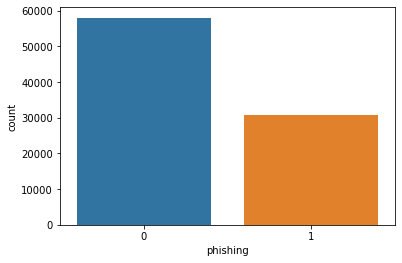

In [9]:
sns.countplot(data['phishing'])

In [10]:
idx = data['phishing'].value_counts().index
vals = data['phishing'].value_counts().values

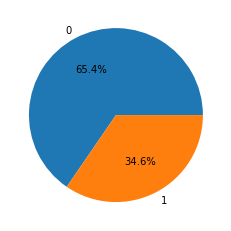

In [11]:
plt.pie(x=vals,labels=idx,autopct='%2.1f%%');

In [12]:
data.nunique()

qty_dot_url             23
qty_hyphen_url          30
qty_underline_url       22
qty_slash_url           25
qty_questionmark_url     6
                        ..
qty_redirects           15
url_google_index         3
domain_google_index      3
url_shortened            2
phishing                 2
Length: 112, dtype: int64

In [13]:
data['qty_dot_url'].unique()

array([ 3,  5,  2,  4,  1,  6,  9,  7,  8, 10, 12, 15, 11, 14, 18, 16, 20,
       13, 17, 23, 24, 19, 22], dtype=int64)

In [14]:
data['qty_dot_url'].value_counts()

2     53649
1     15885
3     13205
4      3593
5      1008
6       454
7       217
14      135
8       120
15       86
9        64
10       48
16       44
13       37
12       33
11       32
17       22
18        6
20        3
22        3
23        1
24        1
19        1
Name: qty_dot_url, dtype: int64

<AxesSubplot:xlabel='qty_dot_url', ylabel='count'>

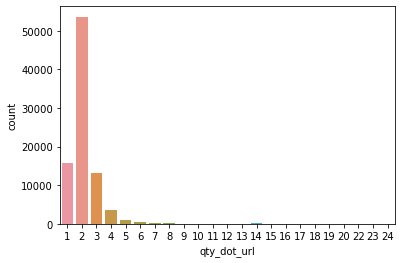

In [15]:
sns.countplot(data['qty_dot_url'])

In [16]:
data['qty_hyphen_url'].unique()

array([ 0,  1,  2,  4,  3,  6,  5,  8,  7, 12, 10,  9, 19, 11, 14, 17, 15,
       18, 13, 20, 26, 25, 35, 23, 34, 24, 21, 31, 16, 27], dtype=int64)

In [17]:
index = data['qty_hyphen_url'].value_counts()[:10].index
values = data['qty_hyphen_url'].value_counts()[:10].values

<AxesSubplot:>

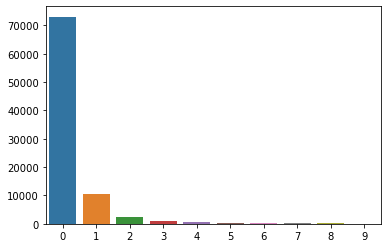

In [18]:
sns.barplot(x = index, y = values)

## Feature Engineering

In [19]:
X = data.drop('phishing',axis=1)
y = data['phishing']

In [20]:
# scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

In [21]:
df = pd.DataFrame(X_scale, columns=X.columns)
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,0.086957,0.0,0.000000,0.022727,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.08,0.1,0.00,0.001477,0.0,0.055556,0.5,0.5,0.0
1,0.173913,0.0,0.047619,0.068182,0.0,0.130435,0.0,0.076923,0.0,0.0,...,0.006689,0.08,0.1,0.05,0.015775,1.0,0.055556,0.5,0.5,0.0
2,0.043478,0.0,0.000000,0.022727,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.08,0.1,0.15,0.000976,1.0,0.055556,0.5,0.5,0.0
3,0.130435,0.0,0.095238,0.113636,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.08,0.1,0.00,0.000484,1.0,0.055556,0.5,0.5,0.0
4,0.043478,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.013599,0.08,0.1,0.05,0.005949,0.0,0.111111,0.5,0.5,0.0


## Model Building

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.30,random_state=2)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((62052, 111), (26595, 111), (62052,), (26595,))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [66]:
models = []
accuracy = []
f1 = []
recall = []
precision = []

## Logistic Regression

In [32]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [33]:
print("Tranning Accuracy: ",log.score(X_train,y_train))
print("Test Accuracy:", log.score(X_test,y_test))

Tranning Accuracy:  0.9271739831109392
Test Accuracy: 0.9299116375258507


In [34]:
log_acc = log.score(X_test,y_test)
log_acc

0.9299116375258507

In [37]:
log_pred = log.predict(X_test)
log_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [ ]:
from sklearn.metrics import f1_score,recall_score,precision_score,classification_report

log_f1_scr = f1_score(y_test,log_pred)
log_recall_scr = recall_score(y_test,log_pred)
log_precision_scr = precision_score(y_test,log_pred)

print(f1_scr,recall_scr,precision_scr)

print(classification_report(y_test,log_pred))

0.9010615711252653 0.9208071165111738 0.8821450841820827
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     17377
           1       0.88      0.92      0.90      9218

    accuracy                           0.93     26595
   macro avg       0.92      0.93      0.92     26595
weighted avg       0.93      0.93      0.93     26595



## Naive Bayes 

In [114]:
naive = GaussianNB()
naive.fit(X_train,y_train)

GaussianNB()

In [115]:
print("Tranning Accuracy: ",naive.score(X_train,y_train))
print("Testing Accuracy: ",naive.score(X_test,y_test))

Tranning Accuracy:  0.8195223361052021
Testing Accuracy:  0.8196653506298176


In [116]:
naive_acc = naive.score(X_test,y_test)
naive_acc

0.8196653506298176

In [117]:
naive_pred = naive.predict(X_test)
naive_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
from sklearn.metrics import f1_score,recall_score,precision_score,classification_report

naive_f1_scr = f1_score(y_test,naive_pred)
naive_recall_scr = recall_score(y_test,naive_pred)
naive_precision_scr = precision_score(y_test,naive_pred)

print(naive_f1_scr,naive_recall_scr,naive_precision_scr)

print(classification_report(y_test,naive_pred))

0.6767322728498247 0.5445866782382296 0.893556425774297
              precision    recall  f1-score   support

           0       0.80      0.97      0.87     17377
           1       0.89      0.54      0.68      9218

    accuracy                           0.82     26595
   macro avg       0.85      0.76      0.78     26595
weighted avg       0.83      0.82      0.81     26595



## KNN 

In [119]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
print("Tranning Accuracy: ",knn.score(X_train,y_train))
print("Testing Accuracy: ",knn.score(X_test,y_test))

Tranning Accuracy:  0.9669793076774318
Testing Accuracy:  0.9538259071253995


In [121]:
knn_acc = knn.score(X_test,y_test)
knn_acc

0.9538259071253995

In [122]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [130]:
knn_f1_scr = f1_score(y_test,knn_pred)
knn_recall_scr = recall_score(y_test,knn_pred)
knn_precision_scr = precision_score(y_test,knn_pred)

print(knn_f1_scr,knn_recall_scr,knn_precision_scr)

print(classification_report(y_test,knn_pred))

0.9331809772554142 0.9302451724886093 0.9361353711790393
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     17377
           1       0.94      0.93      0.93      9218

    accuracy                           0.95     26595
   macro avg       0.95      0.95      0.95     26595
weighted avg       0.95      0.95      0.95     26595



## Decision Tree

In [125]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [126]:
print("Tranning Accuracy: ",dt.score(X_train,y_train))
print("Testing Accuracy: ",dt.score(X_test,y_test))

Tranning Accuracy:  0.9999033069038871
Testing Accuracy:  0.9526602744876856


In [127]:
dt_acc= dt.score(X_test,y_test)
dt_acc

0.9526602744876856

In [128]:
dt_pred = dt.predict(X_test)
dt_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [129]:
dt_f1_scr = f1_score(y_test,dt_pred)
dt_recall_scr = recall_score(y_test,dt_pred)
dt_precision_scr = precision_score(y_test,dt_pred)

print(dt_f1_scr,dt_recall_scr,dt_precision_scr)

print(classification_report(y_test,dt_pred))

0.9317800054185856 0.9327402907355175 0.930821695355635
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17377
           1       0.93      0.93      0.93      9218

    accuracy                           0.95     26595
   macro avg       0.95      0.95      0.95     26595
weighted avg       0.95      0.95      0.95     26595



In [72]:
models.append('Decision Tree')
accuracy.append(dt_acc)

## Random Forest

In [132]:
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)

RandomForestClassifier()

In [133]:
print("Tranning Accuracy: ",Rf.score(X_train,y_train))
print("Testing Accuracy: ",Rf.score(X_test,y_test))

Tranning Accuracy:  0.9999033069038871
Testing Accuracy:  0.971047189321301


In [134]:
Rf_acc = Rf.score(X_test,y_test)
Rf_acc

0.971047189321301

In [135]:
Rf_pred = Rf.predict(X_test)
Rf_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [136]:
rf_f1_scr = f1_score(y_test,Rf_pred)
rf_recall_scr = recall_score(y_test,Rf_pred)
rf_precision_scr = precision_score(y_test,Rf_pred)

print(rf_f1_scr,rf_recall_scr,rf_precision_scr)

print(classification_report(y_test,Rf_pred))

0.9583243126217795 0.9604035582555869 0.9562540505508749
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17377
           1       0.96      0.96      0.96      9218

    accuracy                           0.97     26595
   macro avg       0.97      0.97      0.97     26595
weighted avg       0.97      0.97      0.97     26595



In [137]:
def get_models_performance(model_,acc_,f1_,recall_,precision_):
    
    models.append(model_)
    accuracy.append(acc_)
    f1.append(f1_)
    recall.append(recall_)
    precision.append(precision_)
    
    #creating dataframe
    result = pd.DataFrame({ 'ML Model' : models,
                            'Accuracy' : accuracy,
                            'F1_score' : f1,
                            'Recall' : recall,
                            'Precision' : precision
                          })
    
    # result.to_csv('models_performance_result.csv',index=Flase)
    
    return result
    

In [154]:
get_models_performance('Logistic Regression', log_acc, log_f1_scr, log_recall_scr, log_precision_scr)
get_models_performance('Naive Bayes', naive_acc, naive_f1_scr, naive_recall_scr, naive_precision_scr)
get_models_performance('KNN', knn_acc, knn_f1_scr, knn_recall_scr, knn_precision_scr)
get_models_performance('Decision Tree', dt_acc, dt_f1_scr, dt_recall_scr, dt_precision_scr)
get_models_performance('Random Forest', Rf_acc, rf_f1_scr, rf_recall_scr, rf_precision_scr)

,ML Model,Accuracy,F1_score,Recall,Precision
0,Logistic Regression,0.929912,0.901062,0.920807,0.882145
1,Naive Bayes,0.819665,0.676732,0.544587,0.893556
2,KNN,0.953826,0.933181,0.930245,0.936135
3,Decision Tree,0.952660,0.931780,0.932740,0.930822
4,Random Forest,0.971047,0.958324,0.960404,0.956254


## Among all the algorithms Random Forest works well with the accuracy of 97%